In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn import datasets
from skimage import io, color, transform
import pandas as pd
import os
import random
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("./dataset/SB-FishDisease.csv")

In [4]:
df['target'].value_counts()

target
disease    268
healthy    155
Name: count, dtype: int64

In [5]:
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['sickness'], random_state=42)

print("Träningsuppsättning:")
print(train_df['sickness'].value_counts())

print("\nTestuppsättning:")
print(test_df['sickness'].value_counts())

Träningsuppsättning:
sickness
healthy_fish                         113
bacterial_gill disease                43
fungal_diseases_saprolegniasis        37
bacterial_diseases _aeromoniasis      37
bacterial_red disease                 36
viral_diseases_white_tail_disease     33
parasitic_diseases                    28
healthy_gills                         11
Name: count, dtype: int64

Testuppsättning:
sickness
healthy_fish                         28
bacterial_gill disease               11
bacterial_diseases _aeromoniasis     10
fungal_diseases_saprolegniasis        9
bacterial_red disease                 9
viral_diseases_white_tail_disease     8
parasitic_diseases                    7
healthy_gills                         3
Name: count, dtype: int64


In [6]:
def load_images(file_paths, target_size=(64, 64)):
    images = []
    for path in file_paths:
        img = io.imread(path)
        img_resized = transform.resize(img, target_size)
        images.append(img_resized)

    sizes = images[0].shape
    images_resized = [transform.resize(img, sizes) for img in images]

    return np.stack(images_resized)

In [7]:
target_size = (64, 64)
X_train = load_images(train_df['path'], target_size=target_size)
X_test = load_images(test_df['path'], target_size=target_size)
y_train = train_df['target']
y_test = test_df['target']

X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

model = make_pipeline(StandardScaler(), PCA(n_components=100), SVC(kernel='linear', C=1))
model.fit(X_train_flat, y_train)

y_pred = model.predict(X_test_flat)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6588235294117647


In [8]:
def prepare_image(file_path, target_size=(64, 64)):
    img = io.imread(file_path)
    img_resized = transform.resize(img, target_size)
    img_flat = img_resized.flatten()
    return img_flat

In [11]:
def random_image(folder_path):
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

    if not image_files:
        print("Inga bilder hittades i mappen.")
        return None

    random_image = random.choice(image_files)

    img_path = os.path.join(folder_path, random_image)

    return img_path

Förutsägelse: ['disease']


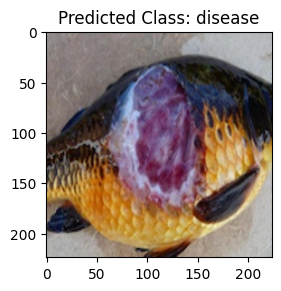

In [12]:
folder_path = './dataset/YOLOstacked/images/'
test_image_path = random_image(folder_path)
test_image = prepare_image(test_image_path)
prediction = model.predict([test_image])

print(f"Förutsägelse: {prediction}")

predicted_class = prediction[0]
original_image = io.imread(test_image_path)

plt.subplot(1, 2, 2)
plt.imshow(original_image)
plt.title(f'Predicted Class: {predicted_class}')

plt.show()